In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

diabetes = pd.read_csv(r'C:\Users\nateisgreat98\Downloads\diabetes.csv') #pulling the data set

In [2]:
diabetes.head() #Testing to see I got the correct data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = diabetes.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = diabetes.iloc[:, 8]

In [4]:
from sklearn.model_selection import train_test_split
import random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = random.randint(0, 100000))
#Split the data into randomized test and training sets

In [5]:
#Standardize the values as Glucose and DPF are very far apart
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [6]:
##################################################################### Question 1

In [7]:
#Using pre-built logistic regression model to generate predictions
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train) 

LogisticRegression(random_state=0)

In [8]:
Y_pred = classifier.predict(X_test)
Y_pred[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [9]:
#Using confusion matrix to obtain accuracy and other statistics
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[91,  6],
       [28, 29]], dtype=int64)

In [10]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.7792207792207793
Precision: 0.8285714285714286
Recall: 0.5087719298245614


Text(0.5, 257.44, 'Predicted label')

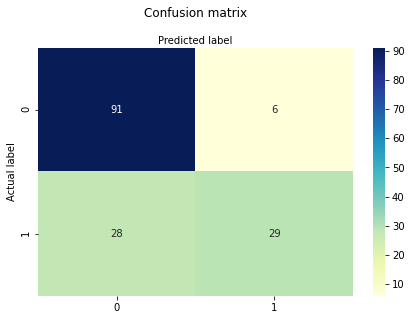

In [11]:
#Heat map of my confusion matrix
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [12]:
#################################################### Question 2

In [13]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train)

GaussianNB()

In [14]:
Y2_pred  =  classifier.predict(X_test)

In [15]:
cnf_matrix = confusion_matrix(Y_test, Y2_pred)

In [16]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y2_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y2_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y2_pred)) 

Accuracy: 0.7662337662337663
Precision: 0.7333333333333333
Recall: 0.5789473684210527


Text(0.5, 257.44, 'Predicted label')

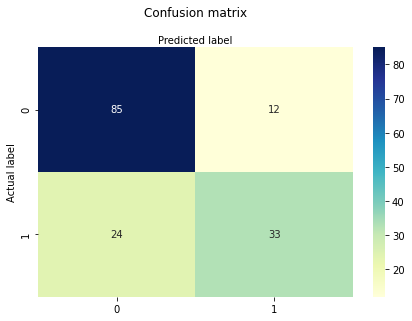

In [17]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [18]:
################################################ Question 3

In [19]:
#K-fold Cross-validation for k=5
from sklearn.model_selection import RepeatedKFold
k = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

In [20]:
classifier = LogisticRegression(random_state=0) 
from sklearn.model_selection import cross_validate
Y3_pred = cross_validate(classifier, X, Y, scoring={'accuracy', 'precision', 'recall'}, cv=k, n_jobs=-1)

In [21]:
from numpy import mean
from numpy import std
print("For Kfold where K = 5 \n")
print("Accuracy: ", np.mean(Y3_pred['test_accuracy']))
print("Precision: ", np.mean(Y3_pred['test_precision']))
print("Recall: ", np.mean(Y3_pred['test_recall']))

For Kfold where K = 5 

Accuracy:  0.7698124098124098
Precision:  0.7219624522332068
Recall:  0.5616658368097677


In [22]:
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)
results = classifier.predict(X_test)

In [23]:
#K-fold Cross-validation for k=10
k = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
Y3_pred2 = cross_validate(classifier, X, Y, scoring={'accuracy', 'precision', 'recall'}, cv=k, n_jobs=-1)

In [24]:
print("For Kfold where K = 10 \n")
print("Accuracy: ", np.mean(Y3_pred2['test_accuracy']))
print("Precision: ", np.mean(Y3_pred2['test_precision']))
print("Recall: ", np.mean(Y3_pred2['test_recall']))

For Kfold where K = 10 

Accuracy:  0.7726725905673274
Precision:  0.7209569062310969
Recall:  0.5640236087525949


In [25]:
################################################ Question 4

In [26]:
classifier = GaussianNB() 
classifier.fit(X_train, Y_train)

GaussianNB()

In [27]:
#K-fold Cross-validation for k=10
k = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
Y4_pred = cross_validate(classifier, X, Y, scoring={'accuracy', 'precision', 'recall'}, cv=k, n_jobs=-1)

In [28]:
print("For Kfold where K = 10 \n")
print("Accuracy: ", np.mean(Y4_pred['test_accuracy']))
print("Precision: ", np.mean(Y4_pred['test_precision']))
print("Recall: ", np.mean(Y4_pred['test_recall']))

For Kfold where K = 10 

Accuracy:  0.756026999316473
Precision:  0.6646286806041585
Recall:  0.6009380399144336


In [29]:
# It does not make sense to do a K-fold analysis for a Bayes model because a Bayes model is just a formula based
# on the data set it is given. As such, the K-fold method will merely generate K different, unrelated, systems.